In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
stu_dataset=pd.read_csv('/content/Grades.csv')

In [ ]:
stu_dataset.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [ ]:
stu_dataset.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [ ]:
stu_dataset.shape

(571, 43)

In [ ]:
stu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [ ]:
stu_dataset.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [ ]:
stu_dataset.isnull().sum().sum()

425

In [ ]:
stu_dataset.duplicated().sum()

0

In [ ]:
stu_dataset.replace(np.nan,0, inplace = True)


In [ ]:
stu_dataset.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [ ]:
stu_dataset.isnull().sum().sum()

0

In [ ]:
stu_dataset.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [ ]:
input = stu_dataset.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = stu_dataset[["CGPA"]]


In [ ]:
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [ ]:

pd.unique(stu_dataset["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [ ]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}


In [ ]:
type(input)

pandas.core.frame.DataFrame

In [ ]:
for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [ ]:
stu_dataset = pd.concat([input, target], axis=1)

Discover and Visualize the Data to Gain Insights:


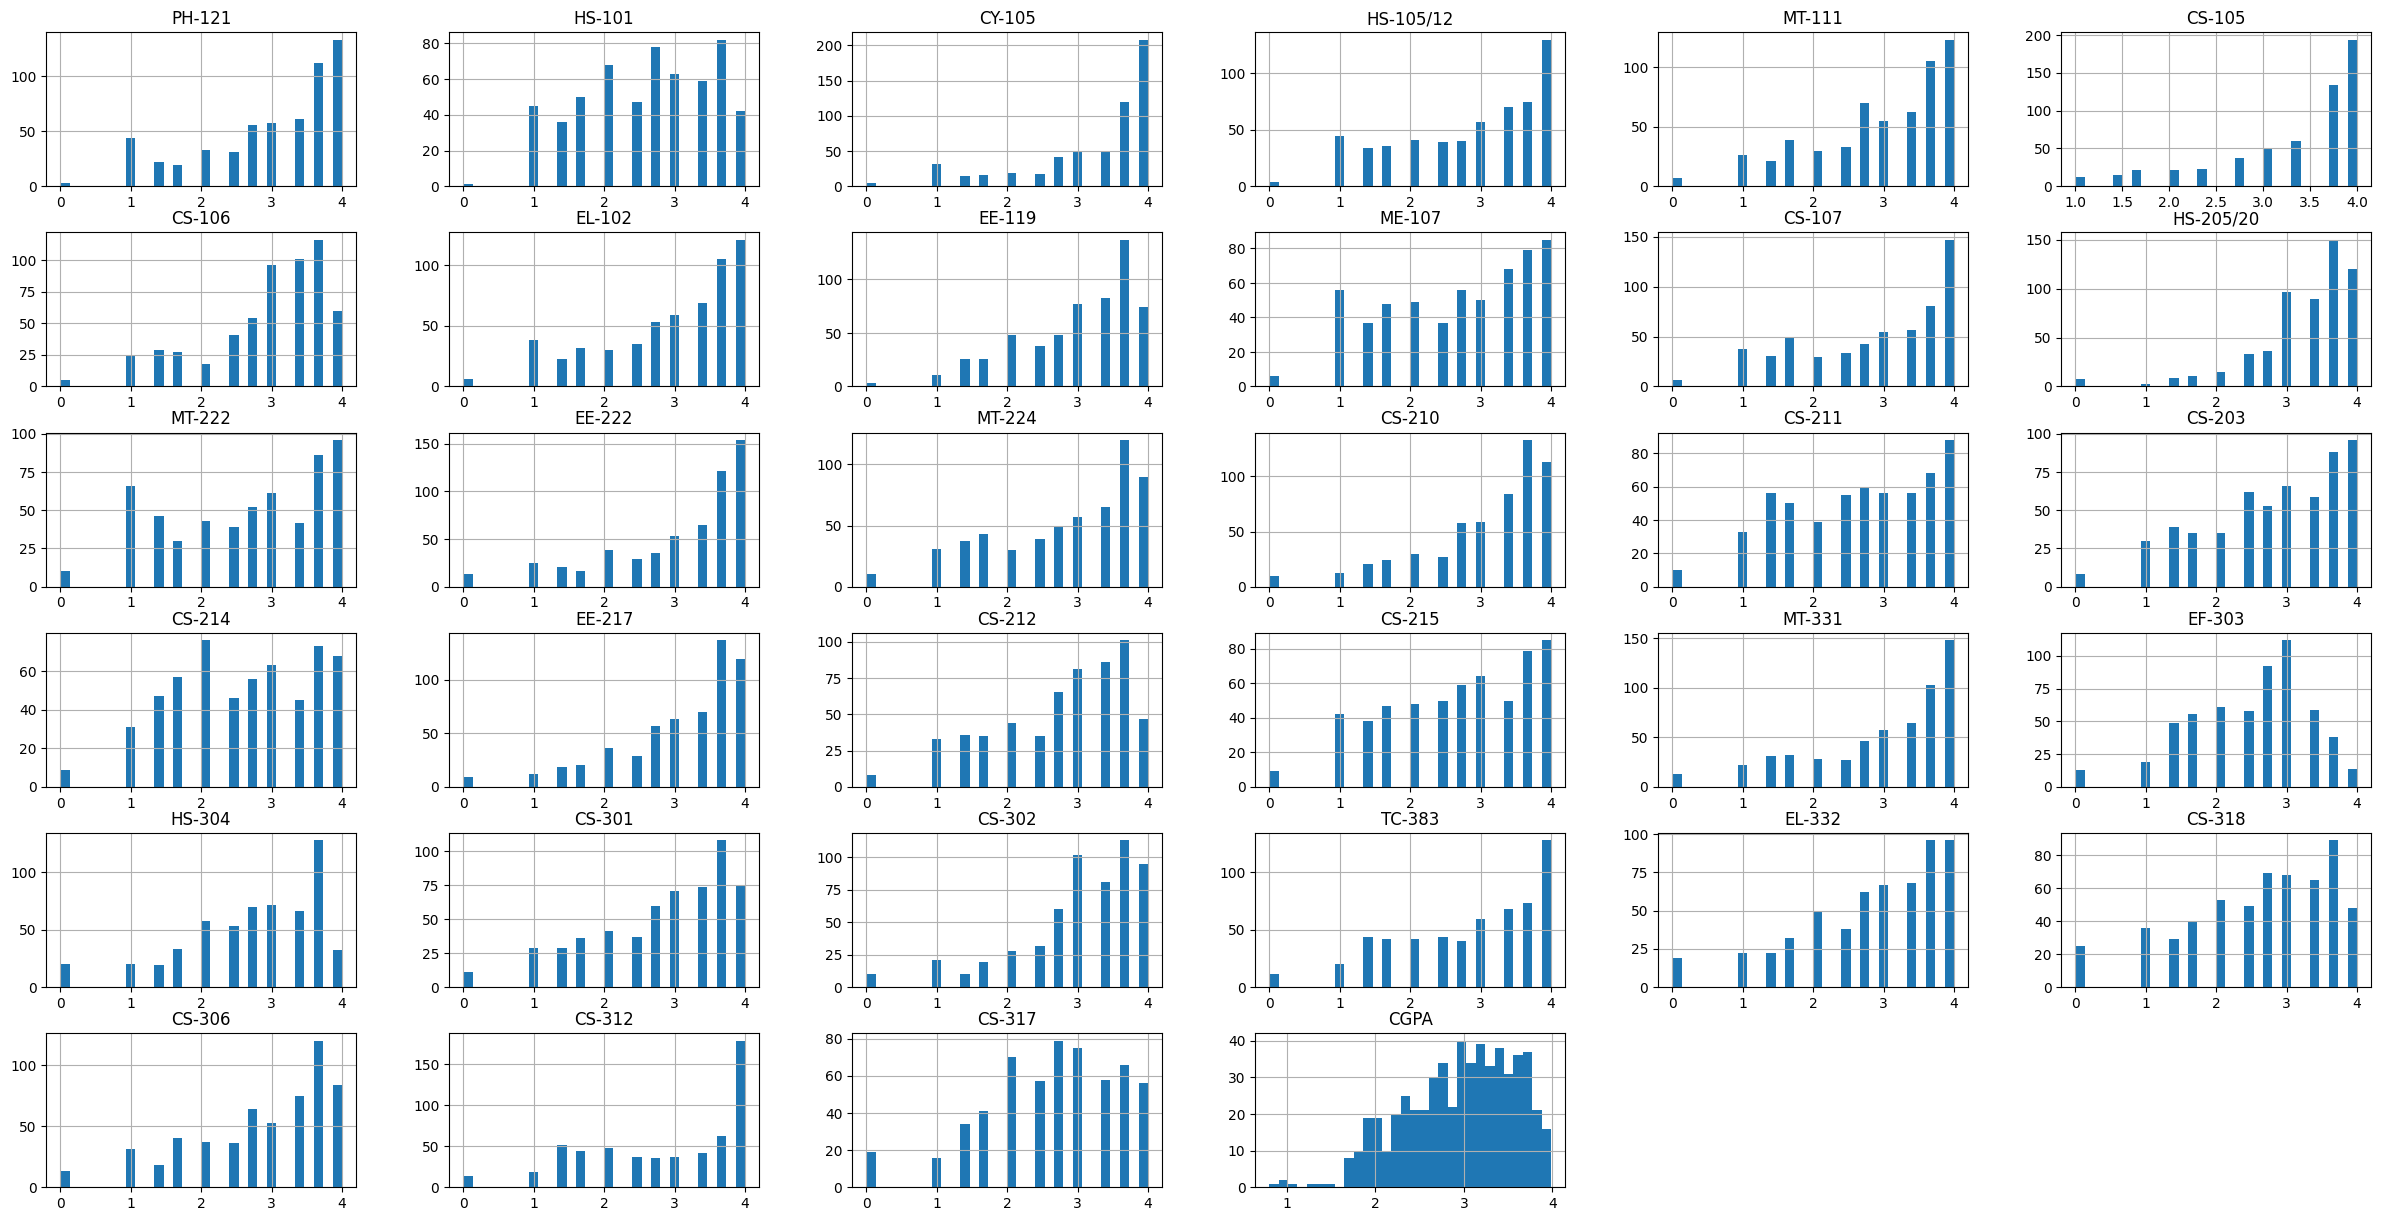

In [ ]:
stu_dataset.hist(bins=30,figsize=(30,15))
plt.show()

<Axes: >

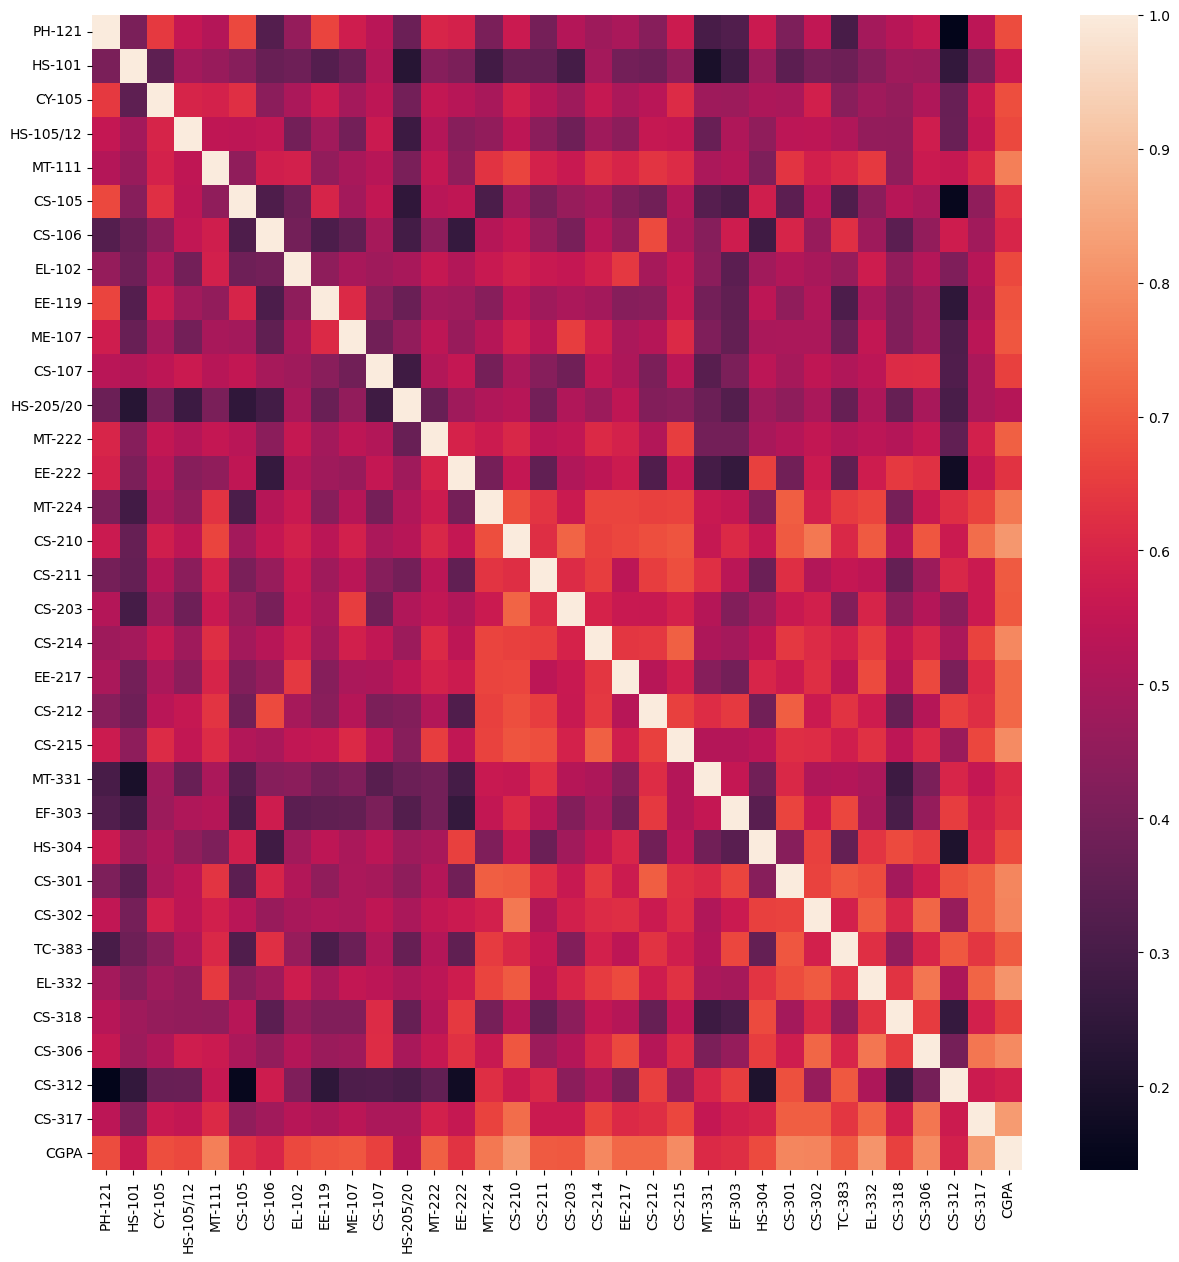

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(stu_dataset.corr())


In [ ]:

stu_dataset.to_csv('cleaned_data.csv')

In [ ]:
model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
 for i in item:
   if i[3]=='1':
    model1_columns.append(i)
   elif i[3]=='2':
    model2_columns.append(i)
   else:
    model3_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns


Prepare the data for Linear Regression:
Model 1: Predict final CGPA based on GPs of first year only.

In [ ]:
labels = stu_dataset['CGPA'].values
features = stu_dataset[list(model1_columns)].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)


In [ ]:
from sklearn import linear_model

# Bulid a new Model
lr_1 = linear_model.LinearRegression()

# Train the Model
lr_1.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_train_predict = lr_1.predict(X_train)

# Predict for training set
y_test_predict = lr_1.predict(X_test)


In [ ]:
input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))


[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[1.98787231]


In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))


The model performance for training set
RMSE is 0.23546495446065754
MAE is 0.18747243655361764
---------------------------------------
The model performance for testing set
RMSE is 0.2350449110326979
MAE is 0.17769767677374207
---------------------------------------
The score of model for testing set
Test score 0.87


In [ ]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)


,Actual,Predict
0,3.208,2.811199
1,2.086,1.885914
2,2.294,2.573290
3,1.804,2.143289
4,3.356,3.286767
...,...,...
167,3.335,3.300622
168,1.787,2.064574
169,2.737,2.448306
170,2.228,2.362247


In [ ]:
# Visualize the Result
idx= np.random.choice(X_test.shape[0])
print ("Predicted CGPA :", y_test_predict[idx])
print ("Actual CGPA :", y_test[idx])


Predicted CGPA : 2.8605961039016137
Actual CGPA : 2.484


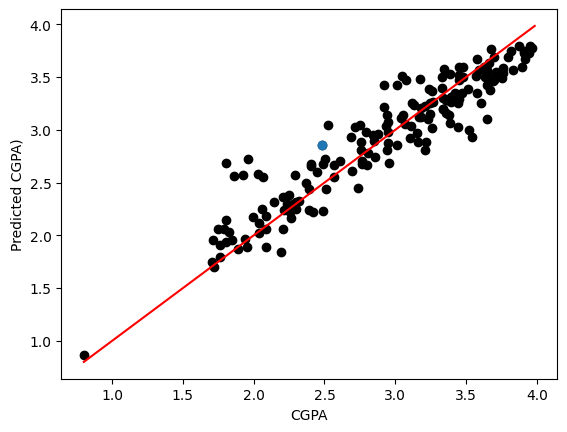

In [ ]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.plot([stu_dataset["CGPA"].min(), stu_dataset["CGPA"].max()], [stu_dataset["CGPA"].min(), stu_dataset["CGPA"].max()], color='red')
plt.show()


Model 2: Predict final CGPA based on GPs of first two years.

In [ ]:
labels = stu_dataset['CGPA'].values
features = stu_dataset[list(model2_columns)].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)


In [ ]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_2 = linear_model.LinearRegression()

# Train the Model
lr_2.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict for training set
y_train_predict = lr_2.predict(X_train)

# Predict for training set
y_test_predict = lr_2.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [ ]:
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_2.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))


The model performance for training set
RMSE is 0.1429639551719365
MAE is 0.1027593138860806
---------------------------------------
The model performance for testing set
RMSE is 0.2441521407454303
MAE is 0.14460586941782344
---------------------------------------
The score of model for testing set
Test score 0.86


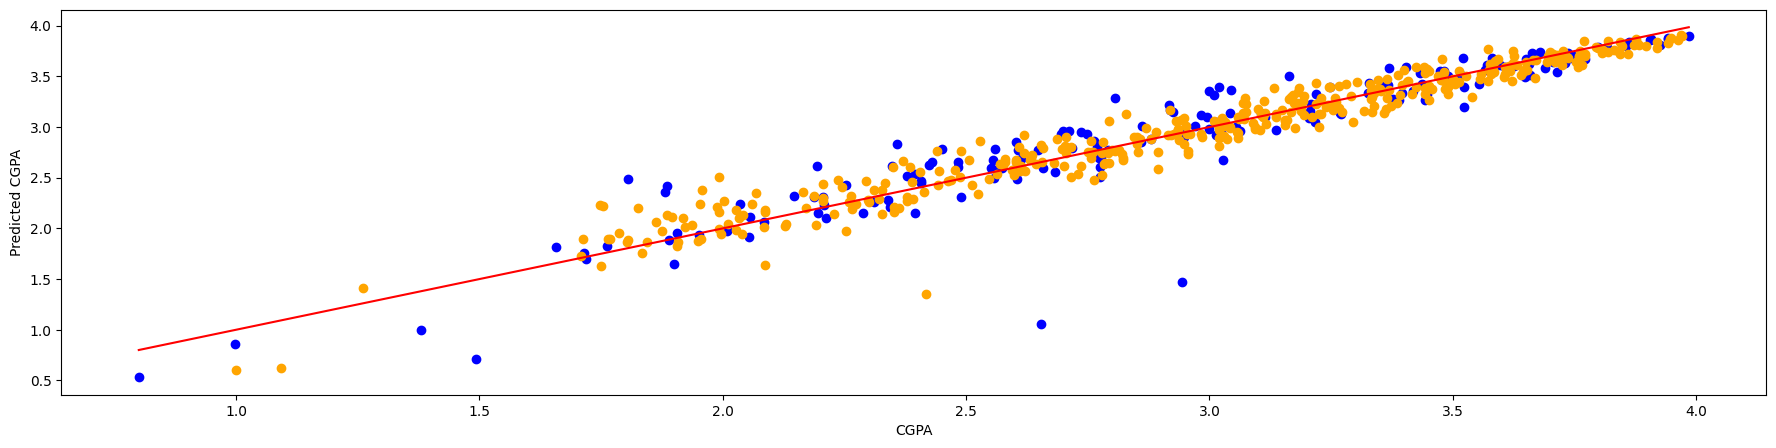

In [ ]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([stu_dataset['CGPA'].min(), stu_dataset['CGPA'].max()], [stu_dataset['CGPA'].min(), stu_dataset['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()


Model 3: Predict final CGPA based on GPs of first three years.

In [ ]:
labels = stu_dataset['CGPA'].values
features = stu_dataset[list(model3_columns)].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)


In [ ]:
from sklearn import linear_model

# Bulid a new Model
lr_3 = linear_model.LinearRegression()

# Train the Model
lr_3.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predict = lr_3.predict(X_train)

# Predict for training set
y_test_predict = lr_3.predict(X_test)

In [ ]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_3.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.14504061069777782
MAE is 0.09093548101937278
---------------------------------------
The model performance for testing set
RMSE is 0.1276600731945724
MAE is 0.09306261120041318
---------------------------------------
The score of model for testing set
Test score 0.96


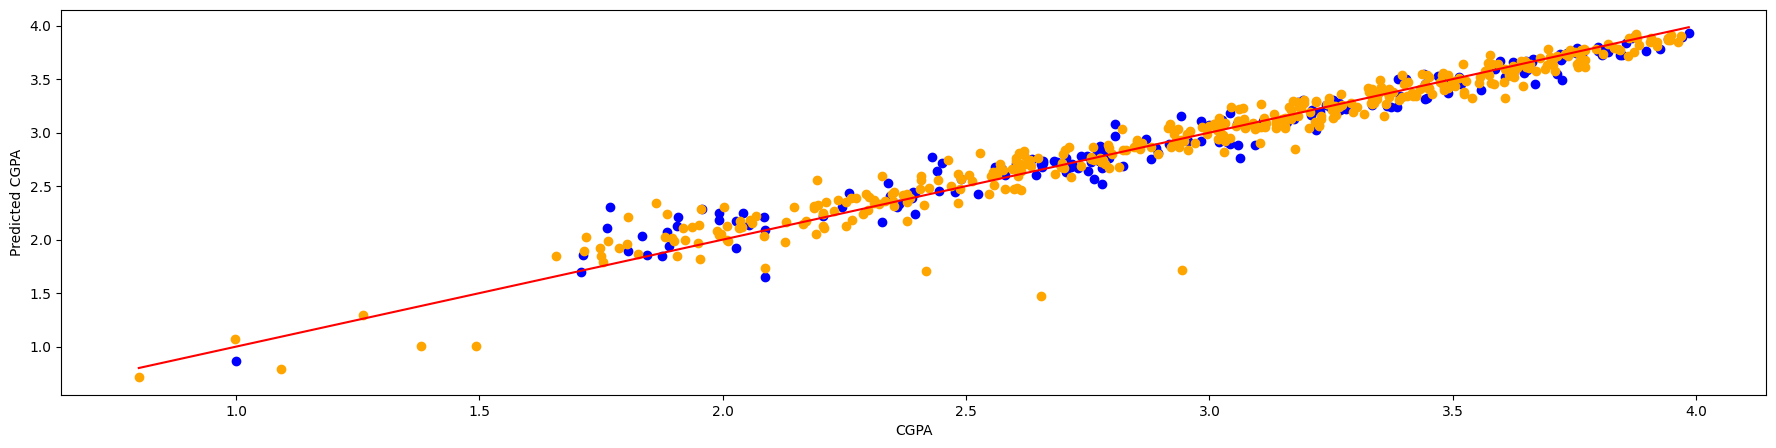

In [ ]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([stu_dataset['CGPA'].min(), stu_dataset['CGPA'].max()], [stu_dataset['CGPA'].min(), stu_dataset['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

